<a href="https://colab.research.google.com/github/guciano/Machine-Learning/blob/master/Submission_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import main core library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [2]:
#Load dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-28 06:10:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.59MB/s    in 50s     

2020-07-28 06:11:04 (6.13 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#Extract (Unzip) zip file
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
#Import Split Folders to divide each dataset, 60% for training data and 40% for validation data
!pip install split-folders
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/split', seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 3799.05 files/s]


In [10]:
len(os.listdir("/tmp/rockpaperscissors/split"))

2

In [12]:
#Create direcetory for training data and validation data
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

#Check Directory

In [13]:
os.listdir('/tmp/rockpaperscissors/split/train')

['rock', 'scissors', 'paper']

In [14]:
os.listdir('/tmp/rockpaperscissors/split/val')

['rock', 'scissors', 'paper']

In [15]:
#Train Directory
t_rock = os.path.join(train_dir, 'rock')
t_paper = os.path.join(train_dir, 'paper')
t_scissors = os.path.join(train_dir, 'scissors')

#Validation Directory
v_rock = os.path.join(validation_dir, 'rock')
v_paper = os.path.join(validation_dir, 'paper')
v_scissors = os.path.join(validation_dir, 'scissors')

In [17]:
#Create image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 19,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 29,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [18]:
#Applying Data Augmentation 
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size =(120,200),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_gen = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (120,200),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
#Defining model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (120,200,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(3, activation = 'softmax')
])

In [20]:
#Summrize and compile
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 21, 256)       2

In [21]:
#Callbacks
accuracy_tresh = 0.97
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > accuracy_tresh):
      print("\nWe've Reached %2.2f%% accuracy, Stop!" %(accuracy_tresh*100))
      self.model.stop_training = True

callbacks = myCallback()

In [24]:
log_history = model.fit(
    train_gen,
    steps_per_epoch = 25,
    epochs = 23,
    validation_data = validation_gen,
    callbacks = [callbacks],
    verbose = 1
)

Epoch 1/23
25/25 [==============================] - 61s 2s/step - loss: 1.5351 - accuracy: 0.3625 - val_loss: 1.0413 - val_accuracy: 0.4315
Epoch 2/23
25/25 [==============================] - 60s 2s/step - loss: 1.0567 - accuracy: 0.5437 - val_loss: 0.6474 - val_accuracy: 0.7751
Epoch 3/23
25/25 [==============================] - 60s 2s/step - loss: 0.5048 - accuracy: 0.8025 - val_loss: 0.5941 - val_accuracy: 0.7728
Epoch 4/23
25/25 [==============================] - 61s 2s/step - loss: 0.4179 - accuracy: 0.8462 - val_loss: 0.4211 - val_accuracy: 0.8870
Epoch 5/23
25/25 [==============================] - 60s 2s/step - loss: 0.2865 - accuracy: 0.8988 - val_loss: 0.3920 - val_accuracy: 0.8584
Epoch 6/23
25/25 [==============================] - 64s 3s/step - loss: 0.2880 - accuracy: 0.9013 - val_loss: 0.2621 - val_accuracy: 0.9110
Epoch 7/23
25/25 [==============================] - 60s 2s/step - loss: 0.2288 - accuracy: 0.9062 - val_loss: 0.2818 - val_accuracy: 0.9110
Epoch 8/23
25/25 [==

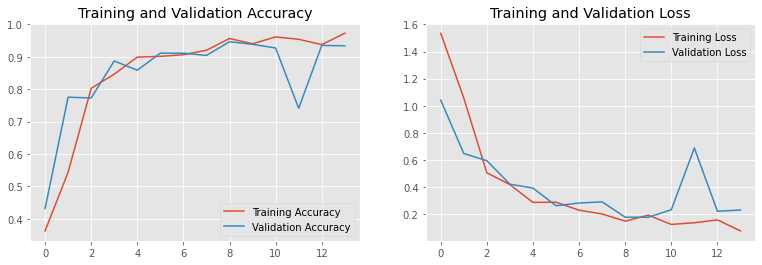

In [27]:
#Vizualizing
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

accur = log_history.history['accuracy']
val_accur = log_history.history['val_accuracy']
loss = log_history.history['loss']
val_loss = log_history.history['val_loss']

epochs = range(len(accur))

style.use('ggplot')
plt.figure(figsize=(13, 4))
for j, metrics in enumerate(zip([accur, loss], [val_accur, val_loss], ['Accuracy', 'Loss'])):
  plt.subplot(1, 2, j + 1)
  plt.plot(epochs, metrics[0], label='Training {}'.format(metrics[2]))
  plt.plot(epochs, metrics[1], label='Validation {}'.format(metrics[2]))
  plt.legend()
  plt.title('Training and Validation {}'.format(metrics[2]))

plt.show()

Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors) (1).png
Rock-paper-scissors_(scissors).png
Scissors | Artinya: Gunting!


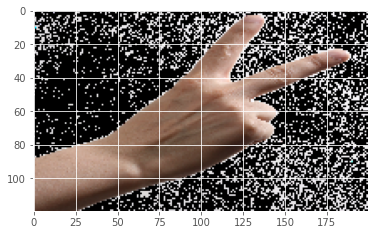

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(120,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Paper | Artinya: Kertas!')
  elif classes[0,1]!=0:
    print('Rock | Artinya: Batu!')
  else:
    print('Scissors | Artinya: Gunting!')